# UCSD - edX Python4DS Final Project
# By: Luis Esquivel

## Load modules and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
original_df = pd.read_excel("./emdat_public_2023_03_09_query_uid-5321or.xlsx", header=6)

# check type, size and df
print(type(original_df), original_df.shape)
original_df

<class 'pandas.core.frame.DataFrame'> (14955, 50)


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14950,2023-0032-USA,2023,32,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3214;3224,NaN,"Alabama, Georgia (Adm1)."
14951,2023-0080-ZAF,2023,80,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2708;77310;77311;77312;77313;77314;77315,NaN,"Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo,..."
14952,2023-0110-ZMB,2023,110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,65234;65235;65236,"Mazabuka, Monze, Namwala (Adm2)."
14953,2023-0095-ZWE,2023,95,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset features

In [3]:
# examine features
print(original_df.columns.shape)
original_df.columns

(50,)


Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [4]:
# examine feature types
original_df.dtypes

Dis No                                        object
Year                                           int64
Seq                                            int64
Glide                                         object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
Disaster Subsubtype                           object
Event Name                                    object
Country                                       object
ISO                                           object
Region                                        object
Continent                                     object
Location                                      object
Origin                                        object
Associated Dis                                object
Associated Dis2                               object
OFDA Response                                 

In [5]:
# create a new df with only the relevant features.
disaster_df = original_df[['Dis No', 'Year', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
                           'Country', 'ISO', 'Region', 'Continent','Start Year', 'Start Month', 'Start Day',
                           'Total Deaths','No Injured', 'No Affected', 'No Homeless','Total Affected']].copy()

# change USD from thousands to millions
disaster_df['Total Damages, Adjusted (\'million US$)'] = original_df['Total Damages, Adjusted (\'000 US$)'] / 1000

# delete all 2023 samples, to have only full years
disaster_df = disaster_df[disaster_df['Year'] < 2023]

# check type, size and df
print(type(disaster_df), disaster_df.shape)
disaster_df

<class 'pandas.core.frame.DataFrame'> (14919, 18)


,Dis No,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,1900,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,843.726
3,1902-0003-GTM,1902,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,2022-0788-ZAF,2022,Hydrological,Flood,Flash flood,South Africa,ZAF,Southern Africa,Africa,2022,12.0,3.0,17.0,NaN,40000.0,NaN,40000.0,NaN
14926,2022-0313-ZAF,2022,Hydrological,Flood,NaN,South Africa,ZAF,Southern Africa,Africa,2022,5.0,22.0,NaN,NaN,200.0,NaN,200.0,NaN
14927,2022-0356-ZAF,2022,Hydrological,Flood,NaN,South Africa,ZAF,Southern Africa,Africa,2022,6.0,13.0,NaN,4.0,200.0,NaN,204.0,NaN
14928,2022-9784-COD,2022,Climatological,Drought,Drought,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,2022,NaN,NaN,NaN,NaN,25972806.0,NaN,25972806.0,NaN


## Data cleaning

### NaN values

In [6]:
disaster_df.isnull().any()
# False means there is no null values.

Dis No                                    False
Year                                      False
Disaster Subgroup                         False
Disaster Type                             False
Disaster Subtype                           True
Country                                   False
ISO                                       False
Region                                    False
Continent                                 False
Start Year                                False
Start Month                                True
Start Day                                  True
Total Deaths                               True
No Injured                                 True
No Affected                                True
No Homeless                                True
Total Affected                             True
Total Damages, Adjusted ('million US$)     True
dtype: bool

There are several features with NaN values. This is acceptable for numerical features like Deaths, injured, damages, because they mean those values are zero. So, for those features, we fill the NaN values with zero.

But for features related to dates, Start Month and Start Day should not have NaN values. From the source of the dataset guidelines (https://www.emdat.be/guidelines), it says this is because the date is uncertain. For this 2 features, we will replace NaN with one, placing the event artificially at January 1st. This should not be a problem if the analysis is done annually and not by month or day.

Also, for categorical features, the NaN values will be replace by 'None'.

In [7]:
disaster_df.columns

Index(['Dis No', 'Year', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent',
       'Start Year', 'Start Month', 'Start Day', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Total Damages, Adjusted ('million US$)'],
      dtype='object')

In [8]:
# fill NaN of all features with zero
disaster_df.fillna(0.0, inplace=True)

# replace 0 of date related features with 1
disaster_df[['Start Month', 'Start Day']] = disaster_df.loc[:,['Start Month', 'Start Day']].replace(0.0,1.0)
# I did it like this because inplace=True didn't work for replace.

# replace 0 of categorical features features with 'None'
disaster_df[['Dis No', 'Disaster Subgroup', 'Disaster Type','Disaster Subtype', 
             'Country', 'ISO', 'Region', 'Continent']] = disaster_df.loc[:,['Dis No', 'Disaster Subgroup', 'Disaster Type',
                                                                            'Disaster Subtype', 'Country', 'ISO', 'Region', 
                                                                            'Continent']].replace(0.0,'None')

# check type, size and df
print(type(disaster_df), disaster_df.shape)
disaster_df

<class 'pandas.core.frame.DataFrame'> (14919, 18)


,Dis No,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,1900,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,1.0,1.0,11000.0,0.0,0.0,0.0,0.0,0.000
1,1900-9001-IND,1900,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900,1.0,1.0,1250000.0,0.0,0.0,0.0,0.0,0.000
2,1902-0012-GTM,1902,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,4.0,18.0,2000.0,0.0,0.0,0.0,0.0,843.726
3,1902-0003-GTM,1902,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,4.0,8.0,1000.0,0.0,0.0,0.0,0.0,0.000
4,1902-0010-GTM,1902,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,10.0,24.0,6000.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,2022-0788-ZAF,2022,Hydrological,Flood,Flash flood,South Africa,ZAF,Southern Africa,Africa,2022,12.0,3.0,17.0,0.0,40000.0,0.0,40000.0,0.000
14926,2022-0313-ZAF,2022,Hydrological,Flood,None,South Africa,ZAF,Southern Africa,Africa,2022,5.0,22.0,0.0,0.0,200.0,0.0,200.0,0.000
14927,2022-0356-ZAF,2022,Hydrological,Flood,None,South Africa,ZAF,Southern Africa,Africa,2022,6.0,13.0,0.0,4.0,200.0,0.0,204.0,0.000
14928,2022-9784-COD,2022,Climatological,Drought,Drought,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,2022,1.0,1.0,0.0,0.0,25972806.0,0.0,25972806.0,0.000


### Year to use

A very important feature for the analysis will be the year, since it can be use to study annual trends. Below is a check to see if the column Year and Start Year are different. In the previous step, we check that this columns don't have NaN values.

In [9]:
year_comp = disaster_df['Year'].compare(disaster_df['Start Year']).rename(columns={'self':'Year','other':'Start Year'})
year_comp['year_dif'] = year_comp['Year'] - year_comp['Start Year']
print('There are different years for {} samples.'.format(year_comp.shape[0]))

year_comp.groupby(by='year_dif').count()

There are different years for 77 samples.


,Year,Start Year
year_dif,,
-3.0,8,8
-2.0,12,12
-1.0,57,57


As we see from the output above, the majority of differences are of 1 year, and the maximum difference is of 3 years.
From the source of the dataset guidelines (https://www.emdat.be/guidelines), it only acknowledges Start Year, not Year, so the decision is to keep Start Year.

In [10]:
del disaster_df['Year'] # notice the Year column was deleted

# check type, size and df
print(type(disaster_df), disaster_df.shape)
disaster_df

<class 'pandas.core.frame.DataFrame'> (14919, 17)


,Dis No,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,1.0,1.0,11000.0,0.0,0.0,0.0,0.0,0.000
1,1900-9001-IND,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900,1.0,1.0,1250000.0,0.0,0.0,0.0,0.0,0.000
2,1902-0012-GTM,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,4.0,18.0,2000.0,0.0,0.0,0.0,0.0,843.726
3,1902-0003-GTM,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,4.0,8.0,1000.0,0.0,0.0,0.0,0.0,0.000
4,1902-0010-GTM,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,10.0,24.0,6000.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,2022-0788-ZAF,Hydrological,Flood,Flash flood,South Africa,ZAF,Southern Africa,Africa,2022,12.0,3.0,17.0,0.0,40000.0,0.0,40000.0,0.000
14926,2022-0313-ZAF,Hydrological,Flood,None,South Africa,ZAF,Southern Africa,Africa,2022,5.0,22.0,0.0,0.0,200.0,0.0,200.0,0.000
14927,2022-0356-ZAF,Hydrological,Flood,None,South Africa,ZAF,Southern Africa,Africa,2022,6.0,13.0,0.0,4.0,200.0,0.0,204.0,0.000
14928,2022-9784-COD,Climatological,Drought,Drought,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,2022,1.0,1.0,0.0,0.0,25972806.0,0.0,25972806.0,0.000


### Chronological order
To check chronological order a date column is needed. For this, pd.to_datetime can be use, but the names of the columns containing the date information need to be 'year', 'month', and 'day'. So, bellow, I rename the date columns and create the new date column.

In [11]:
disaster_df.insert(
    8,
    'date',
    pd.to_datetime(disaster_df[['Start Year', 'Start Month', 'Start Day']].rename(columns={'Start Year':'year', 
                                                                                       'Start Month':'month',
                                                                                       'Start Day':'day'})))

# check type, size and df
print(type(disaster_df), disaster_df.shape)
disaster_df

<class 'pandas.core.frame.DataFrame'> (14919, 18)


,Dis No,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,date,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900-01-01,1900,1.0,1.0,11000.0,0.0,0.0,0.0,0.0,0.000
1,1900-9001-IND,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900-01-01,1900,1.0,1.0,1250000.0,0.0,0.0,0.0,0.0,0.000
2,1902-0012-GTM,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902-04-18,1902,4.0,18.0,2000.0,0.0,0.0,0.0,0.0,843.726
3,1902-0003-GTM,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902-04-08,1902,4.0,8.0,1000.0,0.0,0.0,0.0,0.0,0.000
4,1902-0010-GTM,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902-10-24,1902,10.0,24.0,6000.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,2022-0788-ZAF,Hydrological,Flood,Flash flood,South Africa,ZAF,Southern Africa,Africa,2022-12-03,2022,12.0,3.0,17.0,0.0,40000.0,0.0,40000.0,0.000
14926,2022-0313-ZAF,Hydrological,Flood,None,South Africa,ZAF,Southern Africa,Africa,2022-05-22,2022,5.0,22.0,0.0,0.0,200.0,0.0,200.0,0.000
14927,2022-0356-ZAF,Hydrological,Flood,None,South Africa,ZAF,Southern Africa,Africa,2022-06-13,2022,6.0,13.0,0.0,4.0,200.0,0.0,204.0,0.000
14928,2022-9784-COD,Climatological,Drought,Drought,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,2022-01-01,2022,1.0,1.0,0.0,0.0,25972806.0,0.0,25972806.0,0.000


In [12]:
# now we can check the chronological order
disaster_df['date'].is_monotonic_increasing

False

In [13]:
# because it is false, we need to sort
disaster_df = disaster_df.sort_values(by='date')
disaster_df['date'].is_monotonic_increasing

True

## df checkpoint 1
Here, I save all the changes made to the original_df, saving disaster_df to a pickle file. I do this to save time in case I close the notebook, so I don't have to run all the previous code cells again to generate disaster_df, I can just load it from the pickle file.

In [14]:
# ONLY RUN to save modifications made to original_df
disaster_df.to_pickle("./disaster_df_ckp1.pkl")

In [15]:
# ONLY RUN to load modified df: disaster_df_ckp1
disaster_df = pd.read_pickle("./disaster_df_ckp1.pkl")

# check type, size and df
print(type(disaster_df), disaster_df.shape)
disaster_df

<class 'pandas.core.frame.DataFrame'> (14919, 18)


,Dis No,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,date,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900-01-01,1900,1.0,1.0,11000.0,0.0,0.0,0.0,0.0,0.0
1,1900-9001-IND,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900-01-01,1900,1.0,1.0,1250000.0,0.0,0.0,0.0,0.0,0.0
789,1900-0006-JAM,Hydrological,Flood,None,Jamaica,JAM,Caribbean,Americas,1900-01-06,1900,1.0,6.0,300.0,0.0,0.0,0.0,0.0,0.0
790,1900-0008-JPN,Geophysical,Volcanic activity,Ash fall,Japan,JPN,Eastern Asia,Asia,1900-07-07,1900,7.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0
14191,1900-0009-TUR,Geophysical,Earthquake,Ground movement,Turkey,TUR,Western Asia,Asia,1900-07-12,1900,7.0,12.0,140.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,2022-0818-CAN,Meteorological,Storm,Convective storm,Canada,CAN,Northern America,Americas,2022-12-21,2022,12.0,21.0,4.0,0.0,0.0,0.0,0.0,179.0
14699,2022-0828-CHL,Climatological,Wildfire,Forest fire,Chile,CHL,South America,Americas,2022-12-22,2022,12.0,22.0,2.0,312.0,8094.0,0.0,8406.0,0.0
14636,2022-0847-IDN,Hydrological,Flood,None,Indonesia,IDN,South-Eastern Asia,Asia,2022-12-25,2022,12.0,25.0,1.0,0.0,2990.0,220.0,3210.0,0.0
14789,2022-0832-PHL,Hydrological,Flood,None,Philippines (the),PHL,South-Eastern Asia,Asia,2022-12-25,2022,12.0,25.0,70.0,16.0,600000.0,0.0,600016.0,11.0


## Data profiling
Short description of numerical data, showing count, range by min and max values, mean and standard deviation.

In [16]:
# show descriptive statistics
disaster_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start Year,14919.0,1997.590254,2.076173e+01,1900.0,1989.0,2002.0,2012.000,2.022000e+03
Start Month,14919.0,6.438434,3.396125e+00,1.0,4.0,7.0,9.000,1.200000e+01
Start Day,14919.0,12.779945,9.752833e+00,1.0,3.0,12.0,21.000,3.100000e+01
Total Deaths,14919.0,1532.521349,5.103226e+04,0.0,0.0,6.0,31.000,3.700000e+06
No Injured,14919.0,520.735103,1.677336e+04,0.0,0.0,0.0,2.000,1.800000e+06
No Affected,14919.0,558452.011462,6.768811e+06,0.0,0.0,500.0,21931.500,3.300000e+08
No Homeless,14919.0,11950.931363,2.127694e+05,0.0,0.0,0.0,0.000,1.585000e+07
Total Affected,14919.0,570923.677927,6.832450e+06,0.0,0.0,1500.0,29000.000,3.300000e+08
"Total Damages, Adjusted ('million US$)",14919.0,448.898915,4.229338e+03,0.0,0.0,0.0,30.388,2.732184e+05


Observations:
1. As it is usual with disaster loss data, the standard deviations are high. 
2. There are no negative values (see min column) in the df.
3. Data time range goes from 1900 to 2022.
---

Short description of categorical data, showing the length of its unique values to check if all are unique values.

In [17]:
# unique values of categorical data

for cat_feat in ['Dis No', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent']:
    print('{}:'.format(cat_feat), len(disaster_df[cat_feat].sort_values().unique()))


Dis No: 14919
Disaster Subgroup: 4
Disaster Type: 11
Disaster Subtype: 23
Country: 225
ISO: 225
Region: 23
Continent: 5


Observations:

1. Only 'Dis No' categorical feature have all of its elements as unique values.
2. For all other categorical features, it would be good to know the unique values.

In [18]:
cat_uq = {}
for cat_feat in ['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent']:
    cat_uq[cat_feat] = list(pd.unique(disaster_df[cat_feat].sort_values()))

In [19]:
for k, v in cat_uq.items():
    print (k,':\n', v, '\n')

Disaster Subgroup :
 ['Climatological', 'Geophysical', 'Hydrological', 'Meteorological'] 

Disaster Type :
 ['Drought', 'Earthquake', 'Extreme temperature', 'Flood', 'Fog', 'Glacial lake outburst', 'Landslide', 'Mass movement (dry)', 'Storm', 'Volcanic activity', 'Wildfire'] 

Disaster Subtype :
 ['Ash fall', 'Avalanche', 'Coastal flood', 'Cold wave', 'Convective storm', 'Drought', 'Extra-tropical storm', 'Flash flood', 'Forest fire', 'Ground movement', 'Heat wave', 'Land fire (Brush, Bush, Pasture)', 'Landslide', 'Lava flow', 'Mudslide', 'None', 'Pyroclastic flow', 'Riverine flood', 'Rockfall', 'Severe winter conditions', 'Subsidence', 'Tropical cyclone', 'Tsunami'] 

Country :
 ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Azores Islands', 'Bahamas (the)', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational S

## Disasters frequency

### By Subgroup & Type, total

In [20]:
# df with number of disasters per year by subgroup and type
# is pear year to use these df's also on the next section
for_freq_dagg={}

for dis_agg in ['Disaster Subgroup', 'Disaster Type']:
    for_freq_dagg[dis_agg] = disaster_df[['Start Year',dis_agg, 'Disaster Subtype']].groupby(by=['Start Year',dis_agg]).count()

In [21]:
# cheking them to see if they are ok and as expected
print(for_freq_dagg['Disaster Subgroup'].shape)
for_freq_dagg['Disaster Subgroup']

(430, 1)


Disaster Subtype
Start Year Disaster Subgroup                  
1900       Climatological                    2
           Geophysical                       2
           Hydrological                      1
           Meteorological                    1
1901       Geophysical                       1
...                                        ...
2021       Meteorological                  124
2022       Climatological                   38
           Geophysical                      36
           Hydrological                    194
           Meteorological                  120

[430 rows x 1 columns]

In [22]:
# cheking them to see if they are ok and as expected
print(for_freq_dagg['Disaster Type'].shape)
for_freq_dagg['Disaster Type']

(736, 1)


Disaster Subtype
Start Year Disaster Type                          
1900       Drought                               2
           Earthquake                            1
           Flood                                 1
           Storm                                 1
           Volcanic activity                     1
...                                            ...
2022       Glacial lake outburst                 1
           Landslide                            17
           Storm                               108
           Volcanic activity                     5
           Wildfire                             15

[736 rows x 1 columns]

In [23]:
# df with number of disasters by subgroup
ds_freq = for_freq_dagg['Disaster Subgroup'].groupby(by='Disaster Subgroup').sum().sort_values(by='Disaster Subtype', ascending=False)
ds_freq

,Disaster Subtype
Disaster Subgroup,
Hydrological,6561
Meteorological,5205
Geophysical,1895
Climatological,1258


In [24]:
# df with number of disasters per year by type
dt_freq = for_freq_dagg['Disaster Type'].groupby(by='Disaster Type').sum().sort_values(by='Disaster Subtype', ascending=False)
dt_freq

,Disaster Subtype
Disaster Type,
Flood,5764
Storm,4591
Earthquake,1580
Drought,801
Landslide,797
Extreme temperature,613
Wildfire,454
Volcanic activity,270
Mass movement (dry),45


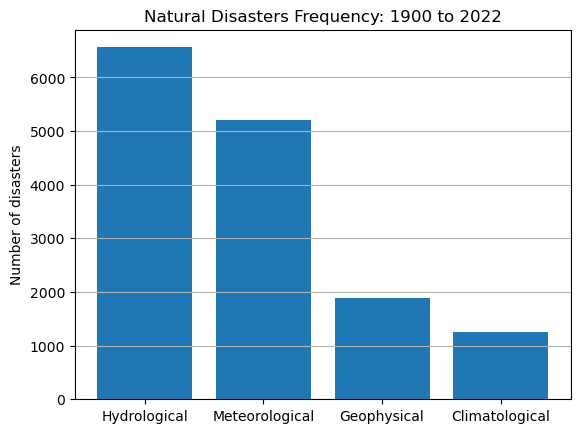

In [25]:
# bar plot

plt.bar(ds_freq.index, ds_freq['Disaster Subtype'].values)

# formatting
plt.ylabel('Number of disasters')
plt.title('Natural Disasters Frequency: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
#plt.xticks(rotation=90)

plt.show()

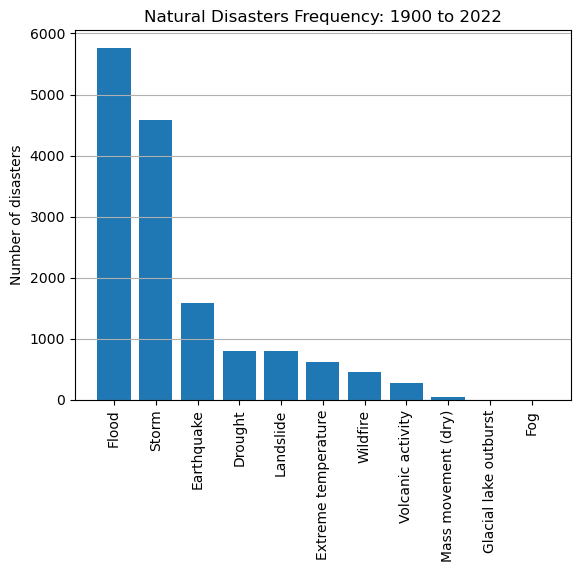

In [26]:
# bar plot

plt.bar(dt_freq.index, dt_freq['Disaster Subtype'].values)

# formatting
plt.ylabel('Number of disasters')
plt.title('Natural Disasters Frequency: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

### All disasters, per year

In [27]:
# generate Years array
years = pd.unique(disaster_df['Start Year'])
print(years.shape)
years

(123,)


array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [28]:
# df with number of disasters per year
for_freq = disaster_df[['Start Year','Disaster Subgroup']].groupby(by='Start Year').count()
print(for_freq.shape)
for_freq

(123, 1)


,Disaster Subgroup
Start Year,
1900,6
1901,1
1902,10
1903,12
1904,4
...,...
2018,318
2019,398
2020,392


In [29]:
# array with number of disasters per year
num_dis = for_freq['Disaster Subgroup'].values
print(num_dis.shape)

(123,)


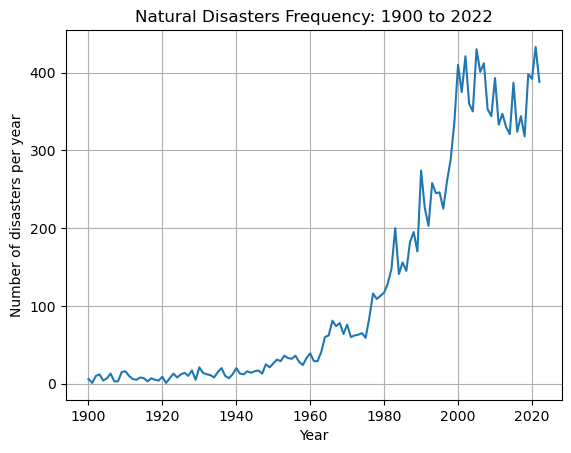

In [30]:
# line plot
plt.plot(years,num_dis)

# formatting
plt.xlabel('Year')
plt.ylabel('Number of disasters per year')
plt.title('Natural Disasters Frequency: 1900 to 2022')
#plt.legend()
plt.grid()

Observations:
1. It is evident the drastic increase in the number of disaster over time. With a little domain knowledge in the natural disasters field, I think this does not exclusively represents that nowadays there a more natural events happening, but also (1) that maybe now we have a better track and registration of them, compared to 1900 to 1950, for instance; and (2) that nowadays they affect humans more before than years ago, because now the world population is a lot more than on 1900 to 1950, for example, and humans are living in more natural risk areas, for example by river margins, and in highly populated areas (e.g. cities).
2. Since 2000, the natural disaster frequency has remain over 300 events per year.

### By Subgroup & Type, per year

Now, I need to generate the arrays for the graphs showing frequency per year.

In [31]:
# arrays with the years, x-values
years_dagg = {}

for dis_agg in ['Disaster Subgroup', 'Disaster Type']:
    for ds in cat_uq[dis_agg]:
        years_dagg[ds] = for_freq_dagg[dis_agg]['Disaster Subtype'].loc[:,ds].index

In [32]:
# arrays with number of disasters subgroup and type per year , y-values
num_dis_dagg = {}      

for dis_agg in ['Disaster Subgroup', 'Disaster Type']:
    for ds in cat_uq[dis_agg]:
        num_dis_dagg[ds] = for_freq_dagg[dis_agg]['Disaster Subtype'].loc[:,ds].values

In [33]:
# cheking one of Disaster Subgroup to see if it is ok and as expected
print(num_dis_dagg['Meteorological'].shape, 'must be equal to:', years_dagg['Meteorological'].shape)
num_dis_dagg['Meteorological']

(119,) must be equal to: (119,)


array([  1,   1,   2,   1,   1,   3,   5,   1,   2,   5,   1,   1,   2,
         1,   2,   1,   2,   1,   2,   6,   2,   3,   7,   4,   7,   2,
         4,   4,   5,   3,   4,   7,   7,   3,   2,   2,   3,   4,   3,
         3,   5,   7,   5,   7,  10,   8,   7,  13,  10,  14,  10,  20,
        14,   9,  15,  16,  20,  15,  14,  23,  22,  20,  29,  25,  27,
        25,  24,  23,  28,  25,  28,  28,  30,  30,  39,  34,  39,  49,
        54,  57,  54,  57,  55,  62,  66,  77, 148,  74,  83, 110,  89,
        93,  81,  92, 100, 114, 132, 128, 138, 111, 140, 160, 100, 129,
       122, 112, 123,  99, 142, 119, 116, 133,  98, 140, 122, 113, 131,
       124, 120], dtype=int64)

In [34]:
# cheking one of Disaster Type to see if it is ok and as expected
print(num_dis_dagg['Earthquake'].shape, 'must be equal to:', years_dagg['Earthquake'].shape)
num_dis_dagg['Earthquake']

(121,) must be equal to: (121,)


array([ 1,  1,  4,  5,  3,  5,  6,  3,  2,  8,  4,  5,  1,  4,  6,  3,  2,
        4,  3,  5,  3,  6,  6,  8,  1,  4,  7,  2, 15,  6,  6,  5,  3,  7,
       11,  3,  2,  7,  7,  8,  8,  9,  6,  8, 10,  3,  7,  7,  7,  7, 13,
        9,  5,  6,  6,  7,  5,  3,  8,  3,  4,  3,  7,  8, 13, 15, 16, 11,
       12,  6,  7,  8,  6,  5, 21, 14,  9, 22, 17, 15, 15, 26, 13, 17, 21,
       15, 15, 19, 41, 29, 25, 20, 25, 26, 13, 23, 30, 33, 30, 25, 37, 40,
       42, 25, 24, 21, 23, 22, 24, 30, 27, 29, 26, 23, 30, 22, 20, 31, 16,
       28, 31], dtype=int64)

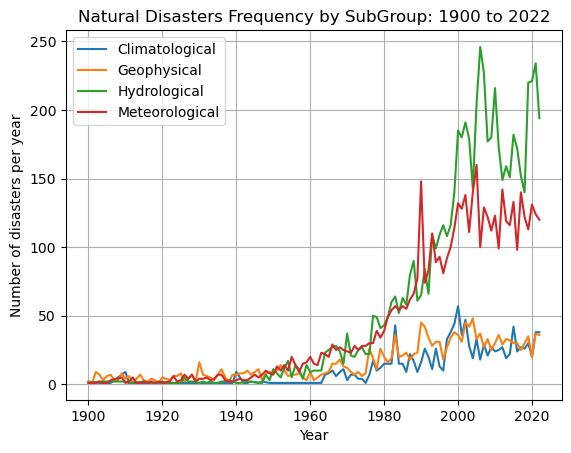

In [35]:
# line plot

for ser in cat_uq['Disaster Subgroup']:
    plt.plot(years_dagg[ser] ,num_dis_dagg[ser], label=ser)

# formatting
plt.xlabel('Year')
plt.ylabel('Number of disasters per year')
plt.title('Natural Disasters Frequency by SubGroup: 1900 to 2022')
plt.legend()
plt.grid()

Observations:
1. Specially clear since 1960, over time, the Hydrological (green line) disasters are the most frequent, followed by the Meteorological (red line), with the exception of the years around 1990.
2. Specially clear since 1960, over time, the Geophysical and Climatological disasters show to be a lot less frequent, by a factor of 6 times.

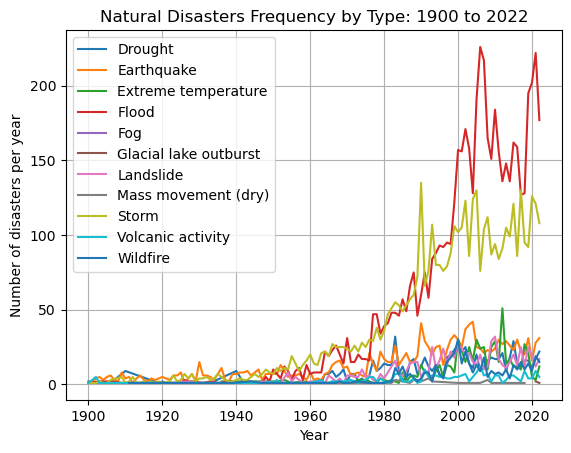

In [36]:
# line plot

for ser in cat_uq['Disaster Type']:
    plt.plot(years_dagg[ser] ,num_dis_dagg[ser], label=ser)

# formatting
plt.xlabel('Year')
plt.ylabel('Number of disasters per year')
plt.title('Natural Disasters Frequency by Type: 1900 to 2022')
plt.legend()
plt.grid()

Observations:
1. Especially clear since 1960, over time, the Floods (red line) disasters are the most frequent, followed by the Storm (yellow line), with the exception of the years around 1990.
2. Especially clear since 1960, over time, other disaster types show to be a lot less frequent.

## Greatest Disaster of All Time

In [37]:
# Because the economic feature has a very long name
econ_label = 'Total Damages, Adjusted (\'million US$)'

In [38]:
# Deadliest
alltime_df = disaster_df[['Dis No', 'Country', 'date', 'Disaster Type', 'Total Deaths', 'Total Affected', econ_label]]
deadliest = alltime_df[alltime_df['Total Deaths'] == alltime_df['Total Deaths'].max()]

deadliest

,Dis No,Country,date,Disaster Type,Total Deaths,Total Affected,"Total Damages, Adjusted ('million US$)"
95,1931-0007-CHN,China,1931-07-01,Flood,3700000.0,0.0,26881.069


In [39]:
most_affected = alltime_df[alltime_df['Total Affected'] == alltime_df['Total Affected'].max()]

most_affected

,Dis No,Country,date,Disaster Type,Total Deaths,Total Affected,"Total Damages, Adjusted ('million US$)"
12000,2015-9618-IND,India,2015-01-01,Drought,0.0,330000000.0,3704.226


In [40]:
greater_econ = alltime_df[alltime_df[econ_label] == alltime_df[econ_label].max()]

greater_econ

,Dis No,Country,date,Disaster Type,Total Deaths,Total Affected,"Total Damages, Adjusted ('million US$)"
10465,2011-0082-JPN,Japan,2011-03-11,Earthquake,19846.0,368820.0,273218.373


In [41]:
pd.options.display.float_format = '{:20,.0f}'.format

In [42]:
greatest = pd.concat([deadliest, most_affected, greater_econ]).drop(columns='Dis No')
greatest.insert(0, 'Impact', ['Deadliest', 'Affecting more people', 'Greatest ecocomic impact'])
greatest

,Impact,Country,date,Disaster Type,Total Deaths,Total Affected,"Total Damages, Adjusted ('million US$)"
95,Deadliest,China,1931-07-01,Flood,"3,700,000",0,"26,881"
12000,Affecting more people,India,2015-01-01,Drought,0,"330,000,000","3,704"
10465,Greatest ecocomic impact,Japan,2011-03-11,Earthquake,"19,846","368,820","273,218"


## Human losses
The focus is on Total Deaths and Total Affected. From the source of the dataset guidelines (https://www.emdat.be/guidelines), this is the definition of the Human Losses features and how the total were calculated:

**Total Deaths = Deaths + Missing**

* Deaths: people who lost their lives because the event happened.
* Missing: people with unknown whereabouts since the event happened.


**Total Affected = Injured + Affected + Homeless**

* Injured: people suffering from physical injuries, trauma, or an illness requiring immediate medical assistance as a direct result of a disaster.
* Affected: people requiring immediate assistance during an emergency situation.
* Homeless: people whose house is destroyed or heavily damaged and therefore need shelter after an event.

In [43]:
disaster_df.head(3)

,Dis No,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,date,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900-01-01,1900,1,1,"11,000",0,0,0,0,0
1,1900-9001-IND,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900-01-01,1900,1,1,"1,250,000",0,0,0,0,0
789,1900-0006-JAM,Hydrological,Flood,None,Jamaica,JAM,Caribbean,Americas,1900-01-06,1900,1,6,300,0,0,0,0,0


In [44]:
# Totals from summing all records
totals_all = disaster_df.describe().transpose()['count'] * disaster_df.describe().transpose()['mean']

totals_all

Start Year                                         29,802,049
Start Month                                            96,055
Start Day                                             190,664
Total Deaths                                       22,863,686
No Injured                                          7,768,847
No Affected                                     8,331,545,559
No Homeless                                       178,295,945
Total Affected                                  8,517,610,351
Total Damages, Adjusted ('million US$)              6,697,123
dtype: float64

In [45]:
# df with number of Deaths and Affected per year by subgroup and type
human_freq={}

for dis_agg in ['Disaster Subgroup', 'Disaster Type']:
    human_freq[dis_agg] = disaster_df[['Start Year',dis_agg, 'Total Deaths', 'Total Affected']].groupby(by=['Start Year',dis_agg]).sum()

In [46]:
# check df by Subgroup
# check if it contains all Deaths and Affected
[print('Total Deaths matches.') if totals_all.loc['Total Deaths'] == human_freq['Disaster Subgroup']['Total Deaths'].sum() else print('Check Total Deaths')]
[print('Total Affected matches.') if round(totals_all.loc['Total Affected'],1) == human_freq['Disaster Subgroup']['Total Affected'].sum() else print('Check Total Affected')]


human_freq['Disaster Subgroup']

Total Deaths matches.
Total Affected matches.


Total Deaths       Total Affected
Start Year Disaster Subgroup                                          
1900       Climatological               1,261,000                    0
           Geophysical                        170                    0
           Hydrological                       300                    0
           Meteorological                   6,000                    0
1901       Geophysical                         18                   24
...                                           ...                  ...
2021       Meteorological                   2,937           17,614,459
2022       Climatological                   2,688          107,181,962
           Geophysical                      1,632            3,713,444
           Hydrological                     8,465           57,409,012
           Meteorological                  17,998           17,010,415

[430 rows x 2 columns]

In [47]:
# check df by Type
# check if it contains all Deaths and Affected
[print('Total Deaths matches.') if totals_all.loc['Total Deaths'] == human_freq['Disaster Type']['Total Deaths'].sum() else print('Check Total Deaths')]
[print('Total Affected matches.') if round(totals_all.loc['Total Affected'],1) == human_freq['Disaster Type']['Total Affected'].sum() else print('Check Total Affected')]


human_freq['Disaster Type']

Total Deaths matches.
Total Affected matches.


Total Deaths       Total Affected
Start Year Disaster Type                                                  
1900       Drought                          1,261,000                    0
           Earthquake                             140                    0
           Flood                                  300                    0
           Storm                                6,000                    0
           Volcanic activity                       30                    0
...                                               ...                  ...
2022       Glacial lake outburst                   11                    0
           Landslide                              403              114,950
           Storm                                1,582           16,928,748
           Volcanic activity                        6               97,333
           Wildfire                                76              237,662

[736 rows x 2 columns]

### By Subgroup

In [48]:
# series with number of disasters by subgroup
ds_human_d = human_freq['Disaster Subgroup']['Total Deaths'].groupby(by='Disaster Subgroup').sum().sort_values(ascending=False)
ds_human_a = human_freq['Disaster Subgroup']['Total Affected'].groupby(by='Disaster Subgroup').sum().sort_values(ascending=False)

print(ds_human_d, '\n\n', ds_human_a)

Disaster Subgroup
Climatological             11,738,942
Hydrological                7,071,249
Geophysical                 2,435,312
Meteorological              1,618,183
Name: Total Deaths, dtype: float64 

 Disaster Subgroup
Hydrological            3,978,823,200
Climatological          2,957,970,686
Meteorological          1,363,568,117
Geophysical               217,248,348
Name: Total Affected, dtype: float64


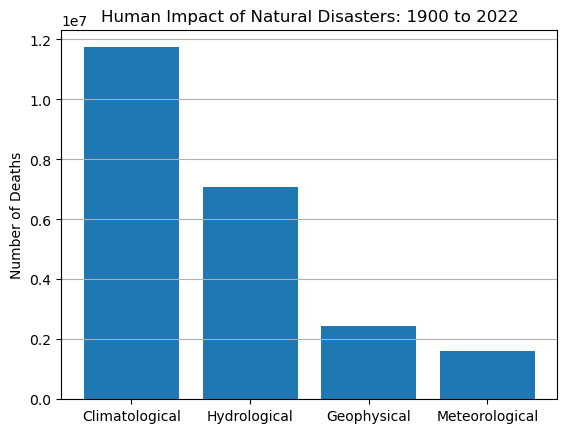

In [49]:
# bar plot

plt.bar(ds_human_d.index, ds_human_d.values)

# formatting
plt.ylabel('Number of Deaths')
plt.title('Human Impact of Natural Disasters: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
#plt.xticks(rotation=90)

plt.show()

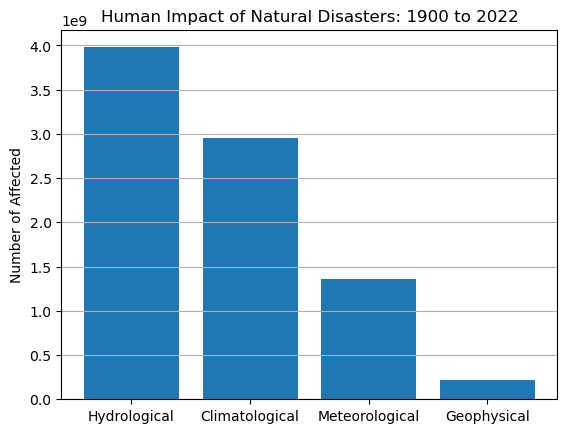

In [50]:
# bar plot

plt.bar(ds_human_a.index, ds_human_a.values)

# formatting
plt.ylabel('Number of Affected')
plt.title('Human Impact of Natural Disasters: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
#plt.xticks(rotation=90)

plt.show()

### By Type

In [51]:
# series with number of disasters by subgroup
dt_human_d = human_freq['Disaster Type']['Total Deaths'].groupby(by='Disaster Type').sum().sort_values(ascending=False)
dt_human_a = human_freq['Disaster Type']['Total Affected'].groupby(by='Disaster Type').sum().sort_values(ascending=False)

print(dt_human_d, '\n\n', dt_human_a)

Disaster Type
Drought                           11,734,025
Flood                              7,003,559
Earthquake                         2,343,914
Storm                              1,403,769
Extreme temperature                  210,414
Volcanic activity                     86,912
Landslide                             67,690
Wildfire                               4,656
Mass movement (dry)                    4,486
Fog                                    4,000
Glacial lake outburst                    261
Name: Total Deaths, dtype: float64 

 Disaster Type
Flood                          3,964,050,771
Drought                        2,939,589,676
Storm                          1,259,876,422
Earthquake                       207,234,967
Extreme temperature              103,691,695
Wildfire                          18,380,986
Landslide                         14,772,429
Volcanic activity                  9,990,264
Mass movement (dry)                   23,117
Glacial lake outburst             

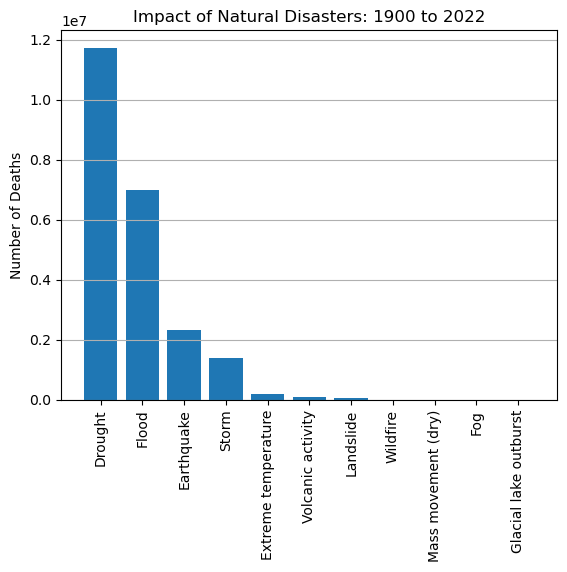

In [52]:
# bar plot

plt.bar(dt_human_d.index, dt_human_d.values)

# formatting
plt.ylabel('Number of Deaths')
plt.title('Impact of Natural Disasters: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

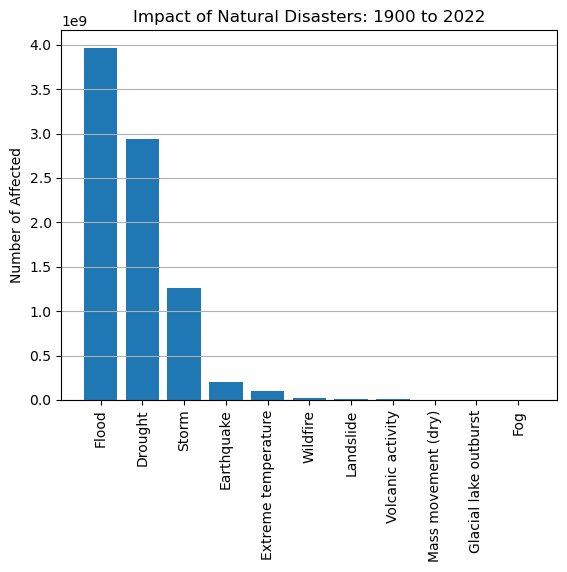

In [53]:
# bar plot

plt.bar(dt_human_a.index, dt_human_a.values)

# formatting
plt.ylabel('Number of Affected')
plt.title('Impact of Natural Disasters: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

## Economic losses

The focus is on Total Damage Adjusted, from the source of the dataset guidelines (https://www.emdat.be/guidelines), this is "*A value of all damages and economic losses directly or indirectly related to the disaster, converted to the curent US$ value.*"

In [60]:
disaster_df.head(3)

,Dis No,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,date,Start Year,Start Month,Start Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('million US$)"
0,1900-9002-CPV,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900-01-01,1900,1,1,"11,000",0,0,0,0,0
1,1900-9001-IND,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,1900-01-01,1900,1,1,"1,250,000",0,0,0,0,0
789,1900-0006-JAM,Hydrological,Flood,None,Jamaica,JAM,Caribbean,Americas,1900-01-06,1900,1,6,300,0,0,0,0,0


In [61]:
# Totals from summing all records, in billion USD
totals_all.loc[econ_label]/1000

6697.122915000035

In [62]:
# df with economic impact per year by subgroup and type
econ_freq={}

for dis_agg in ['Disaster Subgroup', 'Disaster Type']:
    econ_freq[dis_agg] = disaster_df[['Start Year',dis_agg, econ_label]].groupby(by=['Start Year',dis_agg]).sum()

In [64]:
# check df by Subgroup
# check if it contains all billion USD
if round(totals_all.loc[econ_label]/1000,3) == round(econ_freq['Disaster Subgroup'].sum()[0]/1000,3):
    print('Total billion USD matches.')
else:
    print('Check billion USD')

econ_freq['Disaster Subgroup']

Total billion USD matches.


Total Damages, Adjusted ('million US$)
Start Year Disaster Subgroup                                        
1900       Climatological                                          0
           Geophysical                                             0
           Hydrological                                            0
           Meteorological                                      1,053
1901       Geophysical                                             0
...                                                              ...
2021       Meteorological                                    154,742
2022       Climatological                                     35,316
           Geophysical                                        12,613
           Hydrological                                       44,928
           Meteorological                                    130,980

[430 rows x 1 columns]

In [63]:
econ_freq['Disaster Subgroup'].sum()[0]/1000

6697.122915000002

In [65]:
# check df by Type
# check if it contains all billion USD
if round(totals_all.loc[econ_label]/1000,3) == round(econ_freq['Disaster Type'].sum()[0]/1000,3):
    print('Total billion USD matches.')
else:
    print('Check billion USD')

econ_freq['Disaster Type']

Total billion USD matches.


Total Damages, Adjusted ('million US$)
Start Year Disaster Type                                                
1900       Drought                                                     0
           Earthquake                                                  0
           Flood                                                       0
           Storm                                                   1,053
           Volcanic activity                                           0
...                                                                  ...
2022       Glacial lake outburst                                       0
           Landslide                                                   0
           Storm                                                 130,980
           Volcanic activity                                         118
           Wildfire                                                1,076

[736 rows x 1 columns]

### By Subgroup

In [66]:
# series with number of disasters by subgroup
ds_econ = econ_freq['Disaster Subgroup'][econ_label].groupby(by='Disaster Subgroup').sum().sort_values(ascending=False)
ds_econ

Disaster Subgroup
Meteorological              2,906,651
Hydrological                1,656,557
Geophysical                 1,575,658
Climatological                558,257
Name: Total Damages, Adjusted ('million US$), dtype: float64

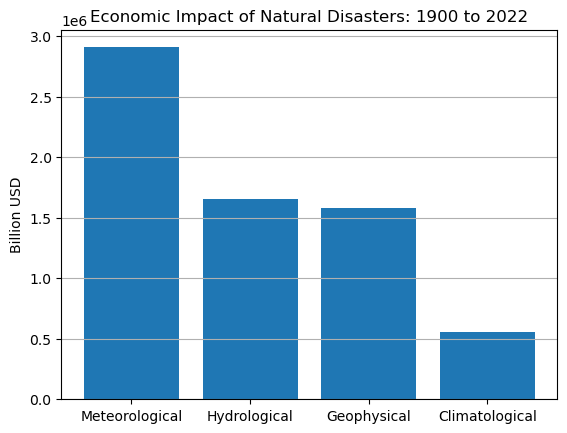

In [67]:
# bar plot

plt.bar(ds_econ.index, ds_econ.values)

# formatting
plt.ylabel('Billion USD')
plt.title('Economic Impact of Natural Disasters: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
#plt.xticks(rotation=90)

plt.show()

### By Type

In [68]:
# series with economic impact by subgroup
dt_econ = econ_freq['Disaster Type'][econ_label].groupby(by='Disaster Type').sum().sort_values(ascending=False)
dt_econ

Disaster Type
Storm                              2,780,777
Flood                              1,635,063
Earthquake                         1,559,415
Drought                              374,288
Wildfire                             183,742
Extreme temperature                  125,874
Landslide                             21,495
Volcanic activity                     14,295
Mass movement (dry)                    1,948
Glacial lake outburst                    227
Fog                                        0
Name: Total Damages, Adjusted ('million US$), dtype: float64

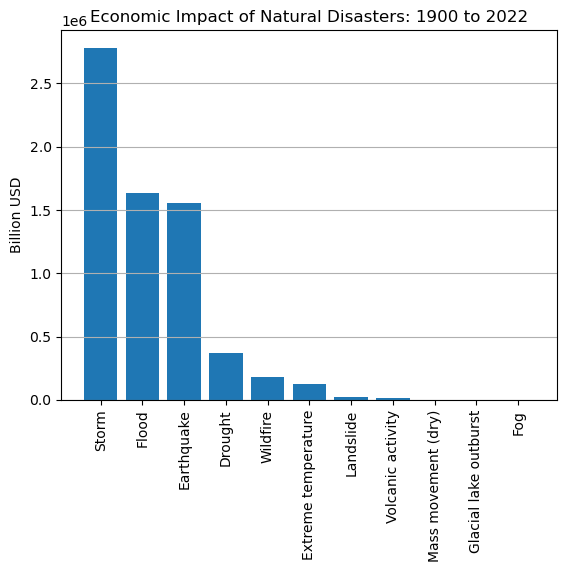

In [69]:
# bar plot

plt.bar(dt_econ.index, dt_econ.values)

# formatting
plt.ylabel('Billion USD')
plt.title('Economic Impact of Natural Disasters: 1900 to 2022')
#plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.show()

## Comparison: Top 4 Disasters

As it is shown bellow, in all the impacts examined, the same type or disaster are on the top 4.

In [70]:
print(dt_human_d[:4],'\n\n', dt_human_a[:4],'\n\n', dt_econ[:4])

Disaster Type
Drought                11,734,025
Flood                   7,003,559
Earthquake              2,343,914
Storm                   1,403,769
Name: Total Deaths, dtype: float64 

 Disaster Type
Flood               3,964,050,771
Drought             2,939,589,676
Storm               1,259,876,422
Earthquake            207,234,967
Name: Total Affected, dtype: float64 

 Disaster Type
Storm                   2,780,777
Flood                   1,635,063
Earthquake              1,559,415
Drought                   374,288
Name: Total Damages, Adjusted ('million US$), dtype: float64


To perform the comparison, it is needed to scale the y-axis. I could use the scale methods studied in class, but they have no physical meaning, so, I will transform all the absolute number to relative number, a percentage.

This way, for example, if the number associated with Deaths for a certain Disaster Type is 50%, it means that Disaster Type represents 50% of all the Deaths from all the disasters.

In [71]:
dt_human_d_p = round((dt_human_d[:4].sort_index() / dt_human_d.sum())*100,1)
dt_human_a_p = round((dt_human_a[:4].sort_index() / dt_human_a.sum())*100,1)
dt_econ_p = round((dt_econ[:4].sort_index() / dt_econ.sum())*100,1)

print(dt_human_d_p,'\n\n', dt_human_a_p,'\n\n', dt_econ_p)

Disaster Type
Drought                        51
Earthquake                     10
Flood                          31
Storm                           6
Name: Total Deaths, dtype: float64 

 Disaster Type
Drought                        34
Earthquake                      2
Flood                          46
Storm                          15
Name: Total Affected, dtype: float64 

 Disaster Type
Drought                         6
Earthquake                     23
Flood                          24
Storm                          42
Name: Total Damages, Adjusted ('million US$), dtype: float64


In [72]:
dt_human_d_p.index

Index(['Drought', 'Earthquake', 'Flood', 'Storm'], dtype='object', name='Disaster Type')

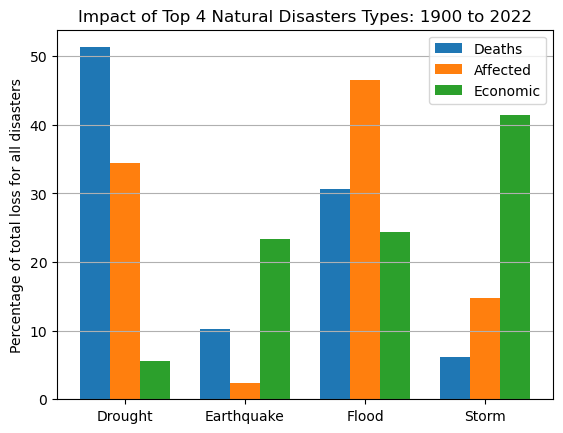

In [73]:
# Grouped bar plot
X_labels = dt_human_d_p.index
X_axis = np.arange(len(dt_human_d_p))
wid = 0.25

plt.bar(X_axis - 1*wid, dt_human_d_p.values, width=wid, label='Deaths')
plt.bar(X_axis, dt_human_a_p.values, width=wid, label='Affected')
plt.bar(X_axis + 1*wid, dt_econ_p.values, width=wid, label='Economic')

plt.xticks(X_axis, X_labels)

# formatting
plt.ylabel('Percentage of total loss for all disasters')
plt.title('Impact of Top 4 Natural Disasters Types: 1900 to 2022')
plt.legend()
plt.grid(axis='y')
#plt.xticks(rotation=90)

plt.show()

Observations, taken into account they correspond to worldwide location and time frame of 1900 to 2022:

1. Droughts are the disaster type that has killed more people, it represents around 50% of the total deaths of all disasters.

2. Floods are the disaster type that has affected more people, it represents around 45% of the total affected of all disasters.

3. Storms are the disaster type that has greater economic impact, it represents around 40% of the total economic impact of all disasters.

4. It can be said that droughts have the greater human impact, while storms have the greater economic impact.

5. No particular disaster concentrate all the greatest impacts.

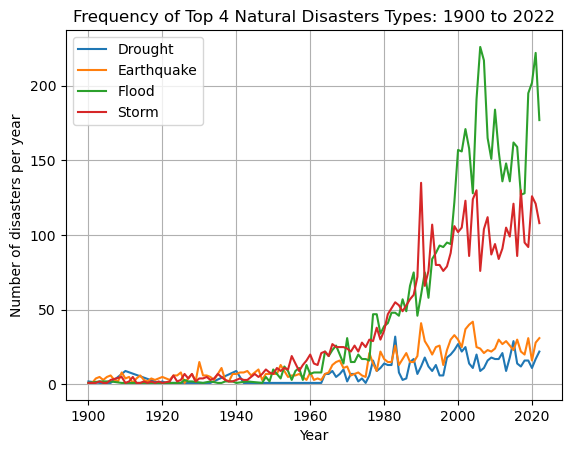

In [74]:
# line plot

for ser in dt_human_d_p.index:
    plt.plot(years_dagg[ser] ,num_dis_dagg[ser], label=ser)

# formatting
plt.xlabel('Year')
plt.ylabel('Number of disasters per year')
plt.title('Frequency of Top 4 Natural Disasters Types: 1900 to 2022')
plt.legend()
plt.grid()

## Regression

I want to known if it is possible to approximate/predict the number of deaths by knowing the disaster type and the region where it happened.

Because number of deaths is a numeric value, the appropriate machine learning technique/method to use would be regression.

### Categorical to numerical
First, because 'Disaster Type' and 'Total Deaths' are categorical data, they need to be transformed to numerical data, since regression algorithms of scikit-learn work with numerical data.

In [75]:
# I will use get_dummies function of Pandas to convert from categorical values to numerical values

# create new df from disaster_df with only variables and target
disaster_reg = disaster_df[['Disaster Type', 'Region', 'Total Deaths']]

# generate new df with dummy integer values corresponding to categorical values
# drop_first parameter enables to delete one dummy variable, to prevent the Dummy Variable Trap
temp_df = pd.get_dummies(disaster_reg[['Disaster Type', 'Region']], drop_first=True)

# concatenate horizontally
disaster_reg = pd.concat([disaster_reg, temp_df], axis=1)

# drop categorical variables
del disaster_reg['Disaster Type']
del disaster_reg['Region']

print(disaster_reg.shape)
disaster_reg

(14919, 33)


,Total Deaths,Disaster Type_Earthquake,Disaster Type_Extreme temperature,Disaster Type_Flood,Disaster Type_Fog,Disaster Type_Glacial lake outburst,Disaster Type_Landslide,Disaster Type_Mass movement (dry),Disaster Type_Storm,Disaster Type_Volcanic activity,...,Region_Polynesia,Region_Russian Federation,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe
0,"11,000",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"1,250,000",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
789,300,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,30,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14191,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14699,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14636,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14789,70,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
disaster_reg.columns

Index(['Total Deaths', 'Disaster Type_Earthquake',
       'Disaster Type_Extreme temperature', 'Disaster Type_Flood',
       'Disaster Type_Fog', 'Disaster Type_Glacial lake outburst',
       'Disaster Type_Landslide', 'Disaster Type_Mass movement (dry)',
       'Disaster Type_Storm', 'Disaster Type_Volcanic activity',
       'Disaster Type_Wildfire', 'Region_Caribbean', 'Region_Central America',
       'Region_Central Asia', 'Region_Eastern Africa', 'Region_Eastern Asia',
       'Region_Eastern Europe', 'Region_Melanesia', 'Region_Micronesia',
       'Region_Middle Africa', 'Region_Northern Africa',
       'Region_Northern America', 'Region_Northern Europe', 'Region_Polynesia',
       'Region_Russian Federation', 'Region_South America',
       'Region_South-Eastern Asia', 'Region_Southern Africa',
       'Region_Southern Asia', 'Region_Southern Europe',
       'Region_Western Africa', 'Region_Western Asia',
       'Region_Western Europe'],
      dtype='object')

### Declare features and target

In [77]:
# Declare columns that will be used as features
reg_feat = ['Disaster Type_Earthquake','Disaster Type_Extreme temperature', 'Disaster Type_Flood',
            'Disaster Type_Fog', 'Disaster Type_Glacial lake outburst','Disaster Type_Landslide', 
            'Disaster Type_Mass movement (dry)','Disaster Type_Storm', 'Disaster Type_Volcanic activity',
            'Disaster Type_Wildfire', 'Region_Caribbean', 'Region_Central America','Region_Central Asia', 
            'Region_Eastern Africa', 'Region_Eastern Asia', 'Region_Eastern Europe', 'Region_Melanesia', 
            'Region_Micronesia', 'Region_Middle Africa', 'Region_Northern Africa', 'Region_Northern America', 
            'Region_Northern Europe', 'Region_Polynesia', 'Region_Russian Federation', 'Region_South America',
            'Region_South-Eastern Asia', 'Region_Southern Africa', 'Region_Southern Asia', 'Region_Southern Europe',
            'Region_Western Africa', 'Region_Western Asia', 'Region_Western Europe']

# Specify target
reg_targ = ['Total Deaths']

#Extract features and target into separate dfs

X = disaster_reg[reg_feat]
y = disaster_reg[reg_targ]

In [78]:
# inspect 1 row of X

X.iloc[3]

Disaster Type_Earthquake               0
Disaster Type_Extreme temperature      0
Disaster Type_Flood                    0
Disaster Type_Fog                      0
Disaster Type_Glacial lake outburst    0
Disaster Type_Landslide                0
Disaster Type_Mass movement (dry)      0
Disaster Type_Storm                    0
Disaster Type_Volcanic activity        1
Disaster Type_Wildfire                 0
Region_Caribbean                       0
Region_Central America                 0
Region_Central Asia                    0
Region_Eastern Africa                  0
Region_Eastern Asia                    1
Region_Eastern Europe                  0
Region_Melanesia                       0
Region_Micronesia                      0
Region_Middle Africa                   0
Region_Northern Africa                 0
Region_Northern America                0
Region_Northern Europe                 0
Region_Polynesia                       0
Region_Russian Federation              0
Region_South Ame

In [79]:
# inspect target
y

,Total Deaths
0,"11,000"
1,"1,250,000"
789,300
790,30
14191,140
...,...
14695,4
14699,2
14636,1
14789,70


### Split data for training and testing

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [81]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9995, 32) (9995, 1)
(4924, 32) (4924, 1)


In [82]:
X_train

,Disaster Type_Earthquake,Disaster Type_Extreme temperature,Disaster Type_Flood,Disaster Type_Fog,Disaster Type_Glacial lake outburst,Disaster Type_Landslide,Disaster Type_Mass movement (dry),Disaster Type_Storm,Disaster Type_Volcanic activity,Disaster Type_Wildfire,...,Region_Polynesia,Region_Russian Federation,Region_South America,Region_South-Eastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Africa,Region_Western Asia,Region_Western Europe
2100,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11107,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7855,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9602,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12504,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y_test

,Total Deaths
14192,86
14884,0
5473,0
6572,5
8367,0
...,...
14469,2
4978,5
2151,37
11816,1


### Linear Regression (LR)

In [84]:
# Create the linear regressor object
regressor = LinearRegression()

# Fine-tuned the parameters of the model
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
type(regressor)

sklearn.linear_model._base.LinearRegression

In [86]:
# Perform prediction
y_prediction = regressor.predict(X_test)
y_prediction

array([[33525.7142655 ],
       [18060.01494075],
       [  132.32568585],
       ...,
       [-2487.74435492],
       [-1312.51668035],
       [-3323.74674819]])

In [87]:
# Are there negative deaths, in how many predictions?
(y_prediction < 0).sum()

2630

Of course negative deaths are impossible. This may correspond to disasters that have not occur in Region, and when trying to predict deaths, that is the result.

I will address this after, just for the sake of curiosity, calculate the Root Mean Square Error (RMSE).

#### LR Accuracy

In [88]:
# to check the range, mean and std of the target
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Deaths,"4,924","1,387","57,389",0,0,6,32,"3,700,000"


As it is common for natural disaster data, the std is very high. In this case, 40 times the means.

In [89]:
# Evaluate error
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

57397.94613060116


The RMSE is approximately 1 std.

### Decision Tree Regression (DTR)

In [90]:
# Create the linear regressor object
regressor = DecisionTreeRegressor(max_depth=20)

# Fine-tuned the parameters of the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [91]:
# Perfomr prediction
y_prediction = regressor.predict(X_test)
y_prediction

array([7942.46666667, 9375.        ,   16.98823529, ...,  395.6       ,
        226.8816568 ,   30.0173913 ])

In [92]:
# Are there negative deaths, in how many predictions?
(y_prediction < 0).sum()

0

This is very good! With the Decision Tree Regressor, there are no negative Deaths.

#### DTR accuracy

In [93]:
# to check the range, mean and std of the target
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Deaths,"4,924","1,387","57,389",0,0,6,32,"3,700,000"


As it is common for natural disaster data, the std is very high. In this case, 40 times the means.

In [94]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

57258.40305891907


The RMSE is approximately 1 std, the same as with the Linear Regressor. The main difference is that the Decision Tree Regressor doesn't predict negative deaths, which is very important.

## Further investigation

1. Calculate losses rates, by dividing the Losses of this notebook by the frequency, to see which disasters produce the most impact, even if they rarely happened.
2. Because floods are more frequent and its greater impact is Human Losses, but no Economic Losses, one could ask another research question: Does floods occur on low income areas, where it produce more Human Losses but not as much Economic Losses?
    For this, the current dataset will have to be expanded, by joining it with another dataset containing some income related feature, for example Gross Domestic Product (GDP), by country, so the analysis can be done at a location unit of country.
3. On the other side, storm are also frequent but its greater impact is Economic. One could ask another research question: Does storms, as opposed to floods, occur on high income areas, where it produce less Human Losses and greater Economic Losses?
    For this, the current dataset will have to be expanded, by joining it with another dataset containing some income related feature, for example Gross Domestic Product (GDP), by country, so the analysis can be done at a location unit of country.
